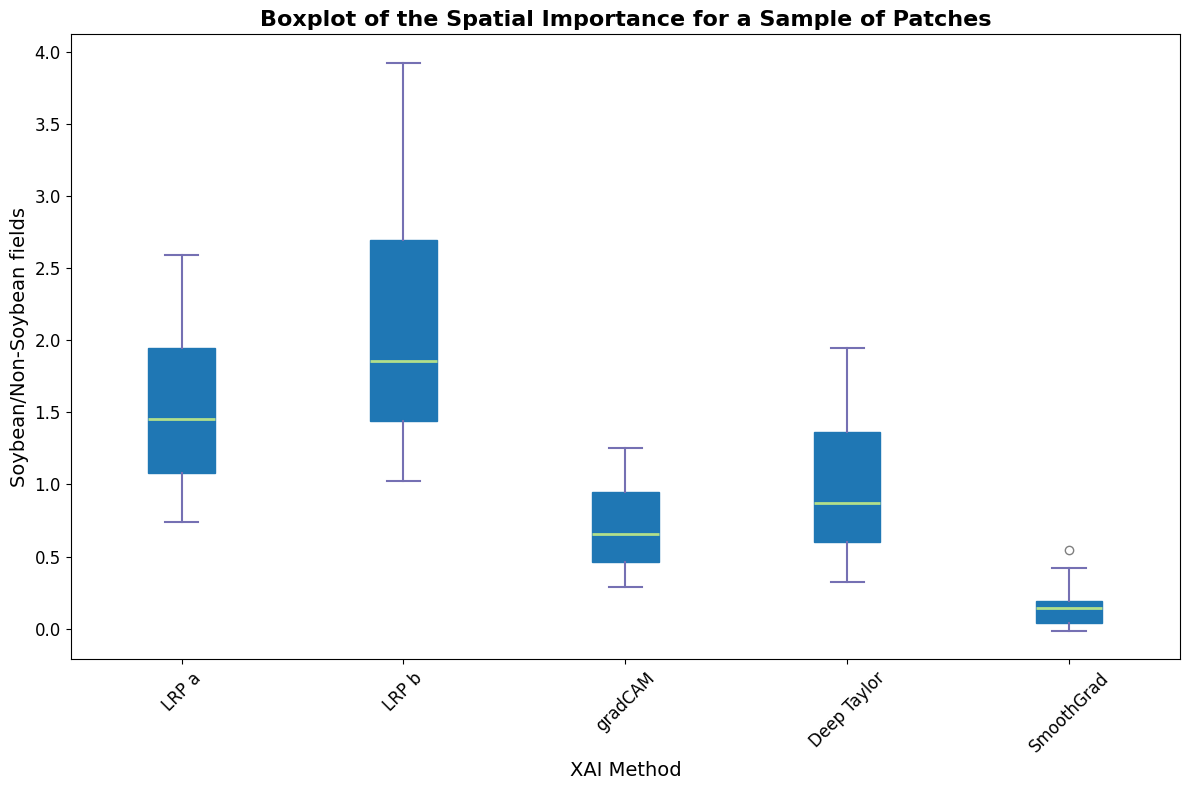

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'spatial_importance_patches.csv'
data = pd.read_csv(file_path)

# Remove the first column which seems to be an identifier
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Calculate the average, min, and max for each XAI method
averages = data_cleaned.mean()
mins = data_cleaned.min()
maxs = data_cleaned.max()

# Create a plot
plt.figure(figsize=(12, 8))

# Plot the boxplot
boxplot = data_cleaned.boxplot(patch_artist=True,widths=0.3)

# Customize the boxplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

# Customize whiskers, caps, medians, and fliers
for whisker in boxplot.lines[::2]:
    whisker.set(color='#7570b3', linewidth=1.5)
for cap in boxplot.lines[1::2]:
    cap.set(color='#7570b3', linewidth=1.5)
for median in boxplot.lines[4::6]:
    median.set(color='#b2df8a', linewidth=2)
for flier in boxplot.lines[5::6]:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.grid(False)

# Add labels and title
plt.xlabel('XAI Method', fontsize=14)
plt.ylabel('Soybean/Non-Soybean fields', fontsize=14)
plt.title('Boxplot of the Spatial Importance for a Sample of Patches', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remove the legend as it is not applicable for boxplot
# plt.legend()

# Save the plot
plt.savefig('enhanced_boxplot_xai_methods.png', bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
boxplot

<Axes: >

In [7]:
data_cleaned

,LRP a,LRP b,gradCAM,Deep Taylor,SmoothGrad
0,1.126243,1.368355,0.630297,0.876736,0.143303
1,0.938597,1.179647,0.389337,0.409694,-0.009069
2,1.791555,2.255450,0.941269,1.237050,0.399478
3,0.741350,1.023423,0.292105,0.326034,0.001449
4,2.366590,3.104714,1.085640,1.808716,0.544219
5,1.065656,1.452610,0.492732,0.674106,-0.009034
6,1.411847,1.854686,0.671688,0.873205,0.051172
7,1.720845,2.290918,0.893642,1.109585,0.189735
8,0.895213,1.176982,0.372960,0.584988,0.042089
9,1.985317,2.885466,0.954554,1.476017,0.194357


In [19]:
averages

LRP a          1.547629
LRP b          2.090454
gradCAM        0.706713
Deep Taylor    0.989108
SmoothGrad     0.152617
dtype: float64

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'spatial_importance_patches.csv'
data = pd.read_csv(file_path)

# Remove the first column which seems to be an identifier
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Calculate the average for each XAI method
averages = data_cleaned.mean()

# Create a DataFrame for the averages
avg_df = pd.DataFrame({
    'XAI Method': averages.index,
    'Average Value': averages.values
})

avg_df.head()

,XAI Method,Average Value
0,LRP a,1.547629
1,LRP b,2.090454
2,gradCAM,0.706713
3,Deep Taylor,0.989108
4,SmoothGrad,0.152617


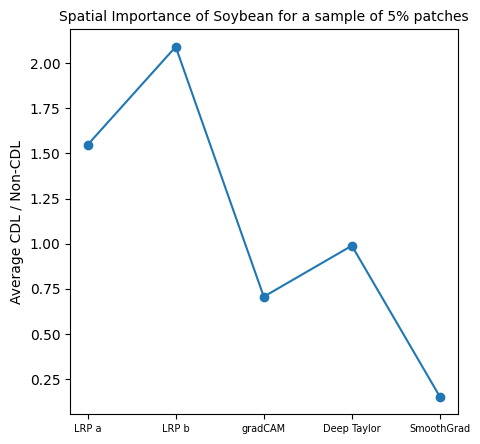

In [16]:
# avg_df.plot()
xai_type = ["LRP a","LRP b","gradCAM","Deep Taylor","SmoothGrad"]
fig, ax = plt.subplots(1,1,figsize=(5,5))
# cdl_rot = np.rot90(cdl,k=3)
# ax[0].imshow(cdl_rot)
# ax[0].axis('off')
# ax[0].set_title('CDL for Soybean',fontsize=10)
ax.plot(xai_type,avg_df["Average Value"],**{'marker': 'o'})
ax.tick_params(axis='x', which='major', labelsize=7)
ax.set_ylabel('Average CDL / Non-CDL')
ax.set_title('Spatial Importance of Soybean for a sample of 5% patches',fontsize=10)
# ax.legend(title='Fruit color')
plt.savefig("average_saliency_Spatial_Coverage.png")